In [61]:
# Importando bibliotecas necessárias
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [93]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def transform_to_RGB(img_array):
    return img_array.reshape(len(img_array), 3,32,32).transpose([0, 2, 3, 1])

def normalize(x_train, x_test):
    mean = np.mean(x_train,axis=(0,1,2,3))
    std = np.std(x_train,axis=(0,1,2,3))
    x_train = (x_train-mean)/(std+1e-7)
    x_test = (x_test-mean)/(std+1e-7)
    return (x_train, x_test)
#     min_val = np.min(x)
#     max_val = np.max(x)
#     x = (x-min_val) / (max_val-min_val)
#     return x

In [94]:
# Definindo número de épocas
epochs = 10
batch_size = 128
# Definindo tamanho das imagens
channels, img_rows, img_cols = 3, 32, 32
img_shape = (channels, img_rows, img_cols)
input_shape = img_shape

### CIFAR-10 dataset ###

# Carregando imagens
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

learning_rate = 0.001
# Definindo informações das classes
num_classes = 10
class_names =  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# Carregando imagens
# batch = unpickle('cifar-10-batches-py/data_batch_1')
# data = transform_to_RGB(batch[b'data'])
# labels = np.array(batch[b'labels'])
# indices = np.random.permutation(labels.shape[0])
# split = int(labels.shape[0]*0.8)
# train_idx, test_idx = indices[:split], indices[split:]
# train_images, test_images = data[train_idx, :], data[test_idx, :]
# train_labels, test_labels = labels[train_idx], labels[test_idx]
# Convertendo os labels de entrada e saída para dummy values

train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

# train_images = normalize(train_images)
# test_images = normalize(test_images)

(train_images, test_images) = normalize(train_images, test_images)




<IPython.core.display.Javascript object>


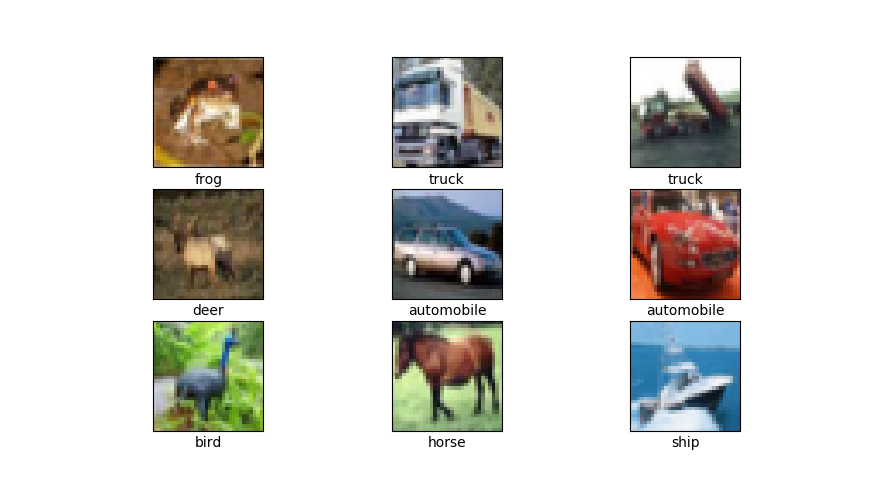

In [65]:
plt.figure(figsize=(3,3))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[np.argmax(train_labels[i])])

In [95]:
model = keras.Sequential([
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape = (32, 32, 3) ),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(),

    keras.layers.Flatten(),

    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),

    
#     keras.layers.Dense(256, activation='relu'),
#     keras.layers.Dropout(0.5),
#     keras.layers.BatchNormalization(),

    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),

#     keras.layers.Dense(1024, activation='relu'),
#     keras.layers.Dropout(0.5),
#     keras.layers.BatchNormalization(),

    keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_76 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
batch_normalization_134 (Bat (None, 30, 30, 64)        256       
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
batch_normalization_135 (Bat (None, 14, 14, 128)       512       
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 6, 6, 256)         0         
__________

In [96]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate),
              metrics=['accuracy'])


checkpoint = keras.callbacks.ModelCheckpoint("model.h5", monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks=callbacks_list
         )

test_loss, test_acc = model.evaluate(test_images, test_labels)
 
print('Test accuracy:', test_acc)

Epoch 1/10
49920/50000 [============================>.] - ETA: 0s - loss: 1.5928 - acc: 0.4444
Epoch 00001: loss improved from inf to 1.59224, saving model to model.h5
50000/50000 [==============================] - 95s 2ms/step - loss: 1.5922 - acc: 0.4447
Epoch 2/10
49920/50000 [============================>.] - ETA: 0s - loss: 0.9978 - acc: 0.6496
Epoch 00002: loss improved from 1.59224 to 0.99726, saving model to model.h5
50000/50000 [==============================] - 84s 2ms/step - loss: 0.9973 - acc: 0.6497
Epoch 3/10
49920/50000 [============================>.] - ETA: 0s - loss: 0.7852 - acc: 0.7282
Epoch 00003: loss improved from 0.99726 to 0.78486, saving model to model.h5
50000/50000 [==============================] - 84s 2ms/step - loss: 0.7849 - acc: 0.7283
Epoch 4/10
49920/50000 [============================>.] - ETA: 0s - loss: 0.6247 - acc: 0.7859
Epoch 00004: loss improved from 0.78486 to 0.62478, saving model to model.h5
50000/50000 [==============================] - 84

In [79]:
# load the model
new_model = keras.models.load_model("model.h5")
np.testing.assert_allclose(model.predict(test_images),
                new_model.predict(test_images),
                1e-5)

# fit the model
new_model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=1,
          verbose=1,
          callbacks=callbacks_list
         )


test_loss, test_acc = new_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 9s 946us/step
Test accuracy: 0.7895


In [82]:
model = keras.models.load_model("model.h5")

In [97]:
from PIL import Image

images = [None]*1
for i in range(len(images)):
    images[i] = Image.open("cifar_data/" + str(i) + ".jpg")
#     images[i] = images[i].convert('L')
    images[i] = images[i].resize(size=(32,32))


<IPython.core.display.Javascript object>


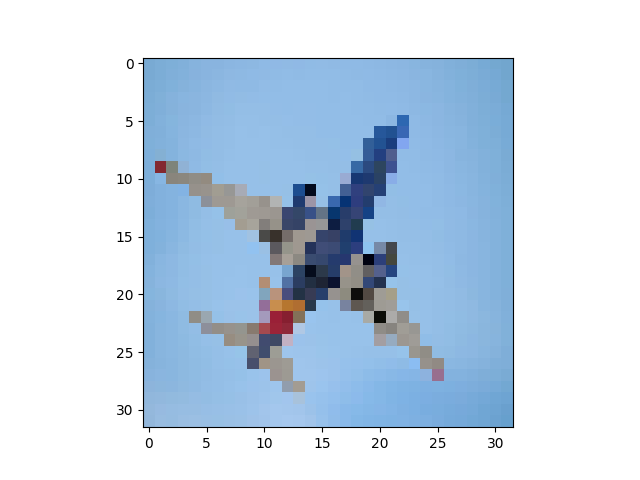

In [87]:
plt.imshow(images[0])

In [91]:
# Definindo funções para o plot das imagens e sua classificação de forma visual
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    true_label = np.argmax(true_label)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    true_label = np.argmax(true_label)
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [ ]:
inf_test_images = []
for img in images:
    img = np.array(img).astype('float32') / 255.0
    inf_test_images.append(img)
    
inf_test_labels = keras.utils.to_categorical(np.arange(10), num_classes)
inf_test_images = np.array(inf_test_images)

inf_predictions = model.predict(inf_test_images)  
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, inf_predictions, inf_test_labels, inf_test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, inf_predictions, inf_test_labels)